In [5]:
#linear Regression output is  continuous values and suit for regression problem
#single neural network

from mxnet import nd
from time import time

a=nd.ones(shape=1000)
b=nd.ones(shape=1000)

In [6]:
start=time()
c=nd.zeros(shape=1000)
for i in range(1000):
    c[i]=a[i]+b[i]

time()-start

0.10731697082519531

In [7]:
start=time()
d=a+b
time()-start


0.0

In [8]:
#usually use vector calculation instead of scalar


In [9]:
a=nd.ones(shape=3)
b=10
a+b




[11. 11. 11.]
<NDArray 3 @cpu(0)>

In [10]:
from matplotlib import  pyplot
import random
from mxnet import autograd
from IPython import display




In [11]:
num_input=2
num_example=1000
true_w=[2,-3.4]
true_b=4.2
features=nd.random.normal(scale=1,shape=(num_example,num_input))
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels+=nd.random.normal(scale=0.01,shape=labels.shape)



In [12]:
features[0],labels[0]



(
 [1.1630785 0.4838046]
 <NDArray 2 @cpu(0)>,
 
 [4.879625]
 <NDArray 1 @cpu(0)>)

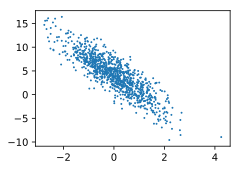

In [14]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    pyplot.rcParams['figure.figsize'] = figsize
    
set_figsize()
pyplot.scatter(features[:,1].asnumpy(),labels.asnumpy(),1);#use ; to only display figure


In [15]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)  # take函数根据索引返回对应元素



In [16]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break




[[-0.4631116  -0.53839856]
 [-0.03348146 -1.0839146 ]
 [-1.599301    0.06591962]
 [ 1.4452155   1.0359799 ]
 [-1.0164676  -0.45853692]
 [-0.79218465  0.9321042 ]
 [-0.71230924 -0.4554856 ]
 [-1.4932036   0.13177635]
 [ 0.15342638  0.14688793]
 [-0.8330337  -1.925278  ]]
<NDArray 10x2 @cpu(0)> 
[ 5.1078997  7.8203945  0.779277   3.5656254  3.727216  -0.5409292
  4.3303323  0.7656811  4.0044847  9.080867 ]
<NDArray 10 @cpu(0)>


In [17]:
w = nd.random.normal(scale=0.01, shape=(num_input, 1))
b = nd.zeros(shape=(1,))



In [18]:
#create the gradients of them
w.attach_grad()
b.attach_grad()



In [19]:
#define model
def linreg(X, w, b):  # 本函数已保存在d2lzh包中方便以后使用
    return nd.dot(X, w) + b

#define loss function
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh包中方便以后使用
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

#define optimize algorithm function 
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh包中方便以后使用
    for param in params:
        param[:] = param - lr * param.grad / batch_size



In [20]:
#train model 
lr=0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))



epoch 1, loss 0.035056
epoch 2, loss 0.000125
epoch 3, loss 0.000048


In [21]:
true_w, w



([2, -3.4],
 
 [[ 1.9994502]
  [-3.3999345]]
 <NDArray 2x1 @cpu(0)>)

In [22]:
true_b, b



(4.2,
 
 [4.2003355]
 <NDArray 1 @cpu(0)>)